In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base ()
# reflect the tables
Base. prepare (engine, reflect = True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.measurement

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23',)

In [11]:
# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days= 365)
one_year

datetime.date(2016, 8, 23)

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
precip_data = session.query (Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).\
    order_by(Measurement.date).all()


In [14]:
# Perform a query to retrieve the data and precipitation scores
d_p_data = session.query (Measurement.date, Measurement.prcp).order_by(Measurement.date.desc()).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame (precip_data, columns = ["Date", "Precipitation"])
precip_df.set_index("Date", inplace = True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


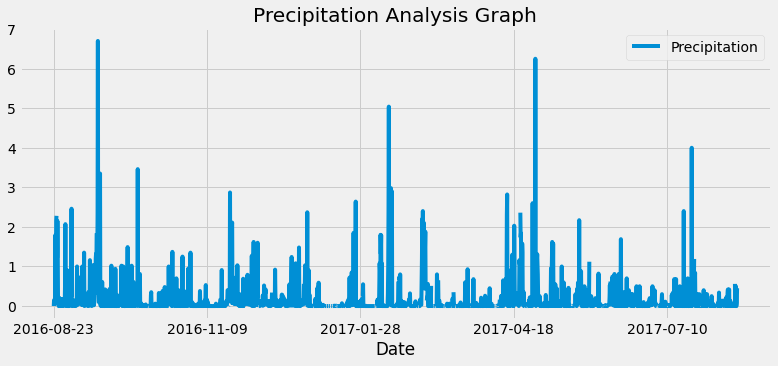

In [23]:
# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(title = "Precipitation Analysis Graph", figsize = (12,5))
plt.legend(loc = 'upper right')
plt.xlabel = "Date"
plt.ylabel = "Inches"

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number stations in the dataset
num_stations = session.query(Measurement.station).distinct().count()
num_stations

9

In [27]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_station = session.query (Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by (func.count(Measurement.station).desc()).all()

active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
temp_request = [func.min(Measurement.tobs),
                func.max (Measurement.tobs),
                func.avg (Measurement.tobs)
               
               
               ]

temp_req = session.query (*temp_request).\
    filter (Measurement.station == "USC00519281").all()

temp_req

[(54.0, 85.0, 71.66378066378067)]

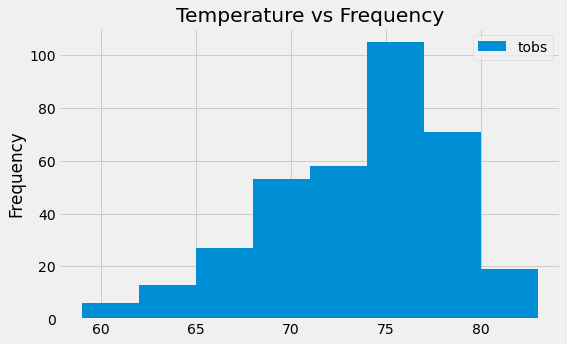

In [33]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

tobs_data = session.query (Measurement.tobs).\
    filter (Measurement.date >= one_year).\
    filter(Measurement.station == "USC00519281").\
    order_by (Measurement.date).all()

tobs_df = pd.DataFrame (tobs_data, columns = ["tobs"])

tobs_df.plot.hist(bins = 8, title = "Temperature vs Frequency", figsize = (8,5))
plt.legend(loc = "upper right")
plt.show()

# Close session

In [ ]:
# Close Session
session.close()